In [278]:
import pandas as pd
import numpy as np
import datetime
import re
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk import FreqDist
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

from sklearn.feature_extraction.text import TfidfVectorizer

In [279]:
news=pd.read_csv('news.csv')

In [280]:
news.head()

,Title,Date,Press,Topic,Text
0,Newt Gingrich: Democrats prove they are the 'L...,2020-09-01,Fox,2020 Presidential Election,Fox News Flash top entertainment and celebrity...
1,Ed Rollins says election could come down to Wi...,2020-09-01,Fox,2020 Presidential Election,White House Strategic Communications Director ...
2,Anti-Trump Lincoln Project launches coalition ...,2020-09-01,Fox,ELECTIONS,"House Minority Leader Kevin McCarthy, R-Calif...."
3,Biden’s tough tone on riots comes amid attacks...,2020-09-01,Fox,ELECTIONS,Steve Hilton highlights President Trump's fulf...
4,NY attorney general files injunction to stop T...,2020-09-02,Fox,ELECTIONS,President Trump holds a ‘Making America Great ...


In [507]:
news['Date']=pd.to_datetime(news['Date'])
date_rng = pd.date_range('2020-08-27', periods = 10, freq='W')
news['Week']=pd.cut(news.Date, bins=date_rng, right=False)

In [282]:
news=news[(news['Date']!='2020-11-01')&(news['Date']!='2020-11-02')]

In [283]:
news.Press.unique()

array(['Fox', 'NPR', 'Reuters', 'CBS', 'Politico'], dtype=object)

In [284]:
Fox=news[news.Press=='Fox']
RN=news[(news.Press=='Reuters')|(news.Press=='NPR')]
CP=news[(news.Press=='CBS')|(news.Press=='Politico')]

In [285]:
Fox['MB']='Right'
RN['MB']='Center'
CP['MB']='Left'

C:\Users\jw517\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jw517\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jw517\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [286]:
news=pd.concat([Fox,RN,CP],ignore_index=True)

In [287]:
news.Text=news.Text.str.lower()

In [288]:
news.Text=news.Text.str.replace('\xa0@|\xa0',' ')
news.Text=news.Text.str.replace("\|\n|\'"," ")
news.Text=news.Text.str.strip()

In [289]:
shortword = re.compile(r'\W*\b\w{1,2}\b')
news.Text=news.Text.str.replace(shortword,'')

In [297]:
# stop_words = set()
lis=stopwords.words('english')

In [321]:
def stopword(x):
    stop_words = set(stopwords.words('english')) 
    result = []
    for i in x: 
        if i not in stop_words: 
            result.append(i)
    return result

def Pstem(x):
    s=PorterStemmer()
    return [s.stem(w) for w in x]

def Lstem(x):
    l=LancasterStemmer()
    return [l.stem(w) for w in x]

def trump(x):
    return x['trump']

def biden(x):
    return x['biden']


In [322]:
eng=re.compile('[a-zA-Z0-9]+')
news.Text.str.findall(eng)[0:10].apply(stopword)

0    [fox, news, flash, top, entertainment, celebri...
1    [white, house, strategic, communications, dire...
2    [house, minority, leader, kevin, mccarthy, cal...
3    [steve, hilton, highlights, president, trump, ...
4    [president, trump, holds, making, america, gre...
5    [former, arkansas, gov, mike, huckabee, discus...
6    [trump, 2020, campaign, senior, adviser, gives...
7    [former, house, speaker, breaks, vice, preside...
8    [cain, latest, fox, bet, super, contest, fox, ...
9    [five, discusses, president, democratic, nomin...
Name: Text, dtype: object


# 1


In [323]:
news['trump_count']=news.Text.str.findall(eng).apply(stopword).apply(FreqDist).apply(trump)
news['biden_count']=news.Text.str.findall(eng).apply(stopword).apply(FreqDist).apply(biden)

In [324]:
count=news.groupby(['MB'])[['trump_count','biden_count']].sum()

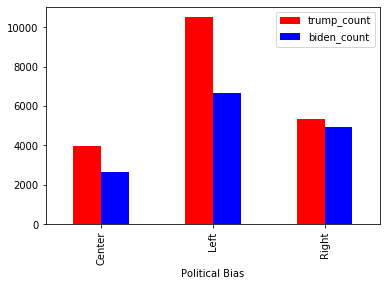

In [486]:
count.plot(kind='bar',xlabel='Political Bias',color=('r','b'))


## 2


In [ ]:
# 일별 후보자 언급 빈도수

In [446]:
date_count=news.groupby(['Date'])[['trump_count','biden_count']].sum()
date_count=date_count.T
date_count['name']=['Trump','Biden']

In [430]:
a=list(range(1,31))
b=list((range(1,32)))
col=a+b
col[0]='9/1'
col[30]='10/1'
col.append('name')
date_count.columns=col

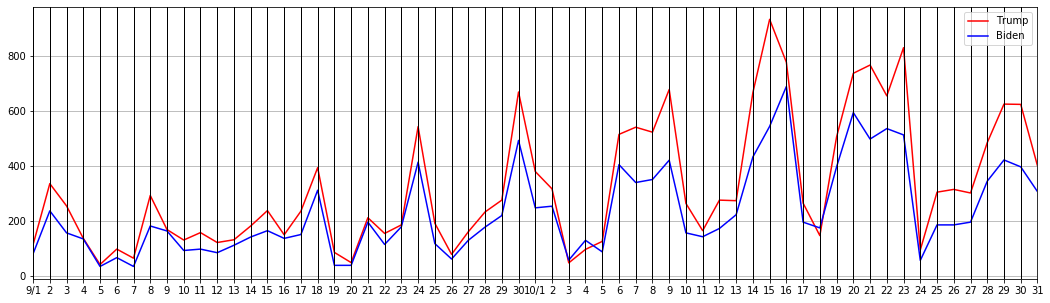

In [431]:
from pandas.plotting import parallel_coordinates

fig,ax=plt.subplots(1,1,figsize=(18,5))
parallel_coordinates(date_count,'name',color=('r','b'),ax=ax)
plt.xlabel=aaa
plt.show()

In [ ]:
# 기간별 후보자 언급 빈도수

In [508]:
date_rng

DatetimeIndex(['2020-08-30', '2020-09-06', '2020-09-13', '2020-09-20',
               '2020-09-27', '2020-10-04', '2020-10-11', '2020-10-18',
               '2020-10-25', '2020-11-01'],
              dtype='datetime64[ns]', freq='W-SUN')

In [479]:
week_count=news.groupby(['Week'])[['trump_count','biden_count']].sum()
week_count=week_count.T

In [480]:
c=list(range(1,10))
week_count.columns=list(map(lambda x:str(x)+' period',c))

In [482]:
week_count['name']=['Trump','Biden']

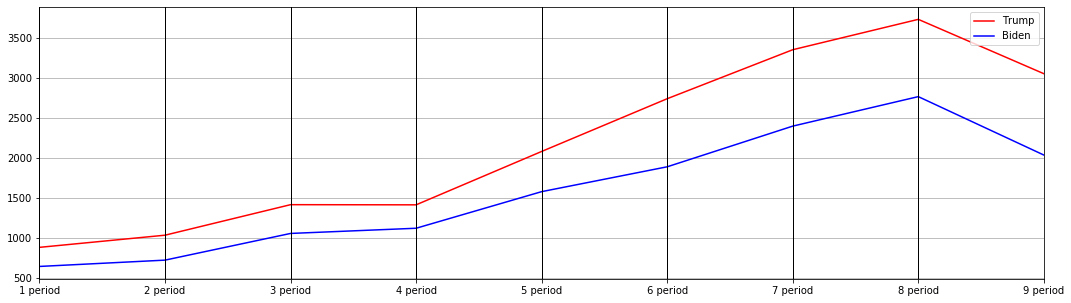

In [502]:
from pandas.plotting import parallel_coordinates

fig,ax=plt.subplots(1,1,figsize=(18,5))
parallel_coordinates(week_count,'name',color=('r','b'),ax=ax)
plt.show()

In [ ]:
#언론사별 후보자 언급 빈도수

In [490]:
mb_count=news.groupby(['MB','Week'])[['trump_count','biden_count']].sum()
mb_count=mb_count.T

In [493]:
center=mb_count['Center']
right=mb_count['Right']
left=mb_count['Left']

In [496]:
c=list(range(1,10))
center.columns=list(map(lambda x:str(x)+' period',c))
right.columns=list(map(lambda x:str(x)+' period',c))
left.columns=list(map(lambda x:str(x)+' period',c))

In [497]:
center['name']=['Trump','Biden']
right['name']=['Trump','Biden']
left['name']=['Trump','Biden']

C:\Users\jw517\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jw517\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jw517\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

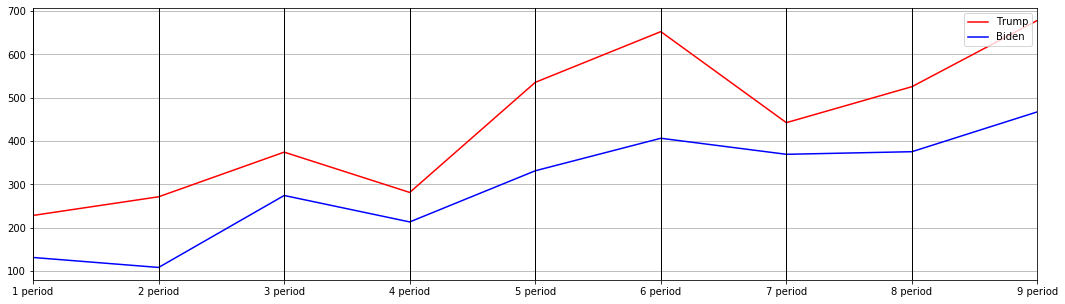

In [503]:
from pandas.plotting import parallel_coordinates

fig,ax=plt.subplots(1,1,figsize=(18,5))
parallel_coordinates(center,'name',color=('r','b'),ax=ax)
plt.
plt.show()

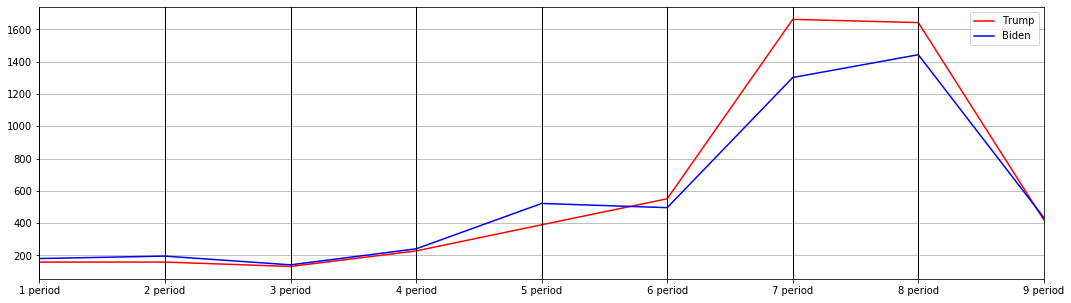

In [504]:
from pandas.plotting import parallel_coordinates

fig,ax=plt.subplots(1,1,figsize=(18,5))
parallel_coordinates(right,'name',color=('r','b'),ax=ax)
plt.show()

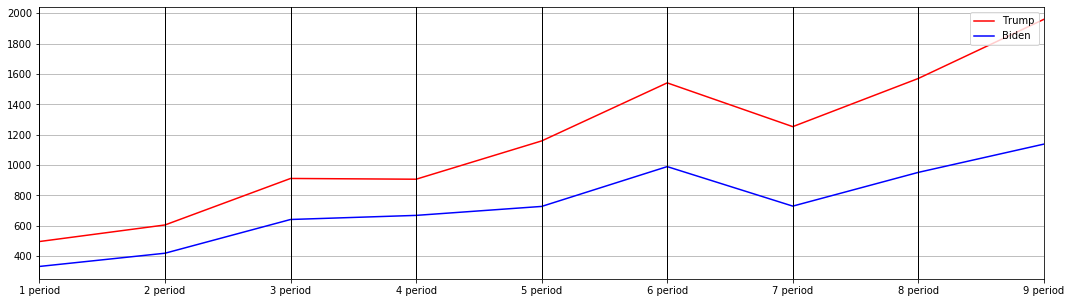

In [505]:
from pandas.plotting import parallel_coordinates

fig,ax=plt.subplots(1,1,figsize=(18,5))
parallel_coordinates(left,'name',color=('r','b'),ax=ax)
plt.show()

In [519]:
MB_date_count=news.groupby(['MB','Date'])[['trump_count','biden_count']].sum()
left_date_count=MB_date_count.T['Left']
left_date_count['name']=['Trump','Biden']

In [520]:
left_date_count.columns=col

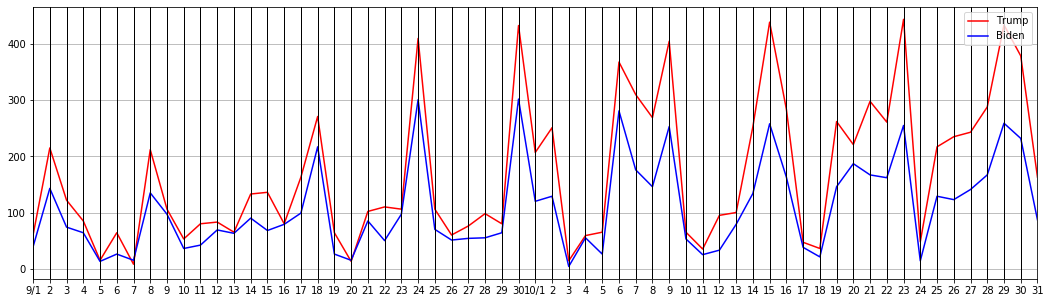

In [523]:
from pandas.plotting import parallel_coordinates

fig,ax=plt.subplots(1,1,figsize=(18,5))
parallel_coordinates(left_date_count,'name',color=('r','b'),ax=ax)
plt.xlabel=aaa
plt.show()


## 3


In [326]:
news['Token']=news.Text.str.findall(eng).apply(stopword)

In [360]:
def upper(x):
    y=[]
    for i in x:
        if i=='trump':
            i='Trump'
        if i=='biden':
            i='Biden'
        y.append(i)
    return y

def join(x):
    return " ".join(x)

def proper_lemmatize(x):
    WL = WordNetLemmatizer()
    lis=[]
    for word,tag in x:
        if tag[0]=='V':
            lis.append(WL.lemmatize(word,'v'))
        elif tag[0]=='J':
            lis.append(WL.lemmatize(word,'a'))
        elif tag[0]=='NNP':
            lis.append(word)
        else:
            lis.append(WL.lemmatize(word))
    return lis

def byebye(x):
    bye=["would", "election", "could", "also", "president",
     "vote", "voter", "house", "run", "two", "rox", 
     "reuters","way","go", "point", "take", "say","Biden",'Trump','think']
    stop_words = bye
    result = []
    for i in x: 
        if i not in stop_words: 
            result.append(i)
    return result

In [361]:
news['tag']=news.Token.apply(upper).apply(pos_tag)

In [362]:
news['Text_A']=news['tag'].apply(proper_lemmatize).apply(byebye).apply(join)

In [363]:
tf=TfidfVectorizer(min_df=2)
tf.fit(news.Text_A)

TfidfVectorizer(min_df=2)

In [366]:
news_week=news.groupby(['Week'])['Text_A'].sum()

In [367]:
news_week

Week
[2020-08-30, 2020-09-06)    fox news flash top entertainment celebrity hea...
[2020-09-06, 2020-09-13)    former 2016 campaign advisor steve moore forme...
[2020-09-13, 2020-09-20)    romney 2012 policy director lanhee chen fox ne...
[2020-09-20, 2020-09-27)    former vice discus healthcare plan final debat...
[2020-09-27, 2020-10-04)    data show nearly million cast already bret bai...
[2020-10-04, 2020-10-11)    senator question amy coney barrett stance affo...
[2020-10-11, 2020-10-18)    vice presidential debate vice mike penny democ...
[2020-10-18, 2020-10-25)    2020 deputy communication director matt wolkin...
[2020-10-25, 2020-11-01)    fox news flash top headline check click foxnew...
Name: Text_A, dtype: object


# 4


In [ ]:
#전체 키워드 top 10

In [528]:
whole_keyword=tf.transform(news_week).toarray().sum(axis=0).argsort()[::-1]
result=[]
voca={j:i for i,j in tf.vocabulary_.items()}
for j in whole_keyword[:10]:
    result.append(voca[j])

pd.DataFrame(result)

,0
0,state
1,ballot
2,campaign
3,debate
4,percent
5,poll
6,woman
7,republican
8,year
9,court


In [ ]:
### 주간 키워드 top10

In [ ]:
def voca_top10(x):
    result=[]
    voca={j:i for i,j in tf.vocabulary_.items()}

    for i in x:
        result1=[]
        i=i[::-1]
        for j in i[:10]:
            result1.append(voca[j])
        result.append(result1)
    return result

In [116]:
keyword=tf.transform(news_week).toarray().argsort()
pd.DataFrame(voca_top10(keyword),index=news_week.index)

,0,1,2,3,4,5,6,7,8,9
Week,,,,,,,,,,
"[2020-08-30, 2020-09-06)",trump,say,biden,woman,voter,percent,election,president,vote,debate
"[2020-09-06, 2020-09-13)",trump,say,biden,woman,tax,voter,zone,percent,president,campaign
"[2020-09-13, 2020-09-20)",trump,say,biden,woman,voter,campaign,state,president,percent,vote
"[2020-09-20, 2020-09-27)",say,trump,biden,voter,woman,election,vote,zone,state,president
"[2020-09-27, 2020-10-04)",trump,biden,say,election,debate,vote,state,voter,president,think
"[2020-10-04, 2020-10-11)",trump,say,biden,election,state,vote,harris,voter,penny,president
"[2020-10-11, 2020-10-18)",trump,biden,say,election,vote,state,president,ballot,voter,debate
"[2020-10-18, 2020-10-25)",trump,say,biden,election,vote,president,state,ballot,voter,debate
"[2020-10-25, 2020-11-01)",trump,say,election,vote,state,biden,ballot,think,voter,alberta


In [ ]:
# 전체 키워드에 대한 카테고리별 top10

In [259]:
def whole_top(ranking,data):
    dic={}
    
    voca={j:i for i,j in tf.vocabulary_.items()}
    array=tf.transform(data).toarray()
    
    for i in whole_keyword[0:ranking]:
        tfidf=[]
        for num in range(len(data)):
            tfidf.append(array[num][i])
        dic[voca[i]]=tfidf
    df=pd.DataFrame(dic)
    return df.T

In [271]:
whole_top(10,news_week)

,0,1,2,3,4,5,6,7,8
trump,0.257477,0.260906,0.264760,0.234318,0.265492,0.226666,0.255334,0.242068,0.223224
say,0.227794,0.232497,0.243980,0.247671,0.214705,0.203476,0.205888,0.207519,0.195616
biden,0.213649,0.206923,0.224600,0.210811,0.229002,0.177352,0.207662,0.203526,0.169010
election,0.125181,0.103902,0.113181,0.140844,0.157478,0.169259,0.171693,0.190287,0.188620
vote,0.120528,0.106788,0.114754,0.131104,0.132092,0.145081,0.159566,0.159706,0.174767
voter,0.154953,0.146602,0.145715,0.162933,0.126701,0.123327,0.134938,0.117316,0.118864
state,0.115146,0.116373,0.134424,0.119538,0.129485,0.145367,0.155306,0.138039,0.174123
president,0.124739,0.127314,0.117592,0.119508,0.125672,0.120049,0.147104,0.140165,0.110232
ballot,0.072834,0.071939,0.076398,0.102917,0.092404,0.112441,0.135814,0.131528,0.132987
campaign,0.104595,0.118535,0.136953,0.094515,0.101108,0.093896,0.101538,0.083776,0.079692



# 5


In [530]:
def J(x):
    WL = WordNetLemmatizer()
    lis=[]
    for word,tag in x:
        if tag[0]=='J':
            lis.append(WL.lemmatize(word,'a'))
        else:
            pass
    return lis

In [531]:
news['Text_B']=news['tag'].apply(J).apply(join)

In [532]:
tfB=TfidfVectorizer(min_df=2)
tfB.fit(news.Text_B)

TfidfVectorizer(min_df=2)

In [538]:
MB_date_b=news.groupby(['MB','Date'])['Text_B'].sum()

In [565]:
lb=MB_date_b['Left']

In [566]:
['2020-10-12', '2020-10-13', '2020-10-14','2020-10-15', '2020-10-16']

['2020-10-12', '2020-10-13', '2020-10-14', '2020-10-15', '2020-10-16']

In [567]:
lba=tfB.transform(lb).toarray().argsort()

In [568]:
def voca_top10(x):
    result=[]
    voca={j:i for i,j in tfB.vocabulary_.items()}

    for i in x:
        result1=[]
        i=i[::-1]
        for j in i[:30]:
            result1.append(voca[j])
        result.append(result1)
    return result

In [569]:
pd.DataFrame(voca_top10(lba),index=lb.index).loc[['2020-10-12', '2020-10-13', '2020-10-14','2020-10-15', '2020-10-16']]

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-12,ufc,final,fivethirtyeight,average,progressive,qanon,many,gop,democratic,international,...,dnc,good,green,national,social,civil,similar,young,new,pro
2020-10-13,colombian,likely,aerial,colombia,stein,canada,new,united,manual,electoral,...,technological,presidential,percent,high,public,monday,trudeau,precinct,chinese,nba
2020-10-14,ufc,final,colombian,alberta,early,many,last,electoral,fivethirtyeight,average,...,win,close,large,danny,aerial,colombia,diaz,republican,florida,long
2020-10-15,early,republican,cbs,ufc,many,last,texas,new,final,democratic,...,electoral,least,positive,florida,first,recent,political,real,likely,pandemic
2020-10-16,ufc,early,final,colombian,electoral,percent,alberta,last,average,many,...,good,much,close,former,long,north,progressive,qanon,win,little
